In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob

In [58]:
name = ('GPrun_50iter_*prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
print(file_list)
# print(filelist)

['NionRelated/GPrun_50iter_0_prediction_UCB_2_0.npy', 'NionRelated/GPrun_50iter_3_prediction_UCB_2_0.npy', 'NionRelated/GPrun_50iter_4_prediction_UCB_2_0.npy', 'NionRelated/GPrun_50iter_2_prediction_UCB_2_0.npy', 'NionRelated/GPrun_50iter_1_prediction_UCB_2_0.npy']


In [59]:
for filename in file_list:
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    print(pred[-1])
    # best_seen = np.argmax(pred)
    # print(np.abs(abr[best_seen,:] - np.array([0.5] * 12)))
    # print(np.abs(abr[0,:] - np.array([0.5] * 12)))

[0.98942177]
[0.97593659]
[0.96433232]
[0.97814223]
[0.98161919]


In [56]:
print(abr[best_seen])

[0.49846211 0.50170641 0.50510287]


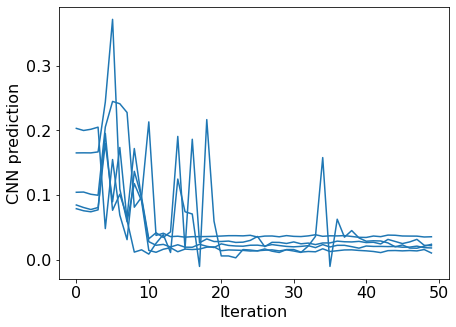

In [53]:
fig, ax = plt.subplots(1,1, figsize = [7,5])
for filename in file_list:
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))

    p = ax.plot(1 - pred, c = 'C0')
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel('CNN prediction', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

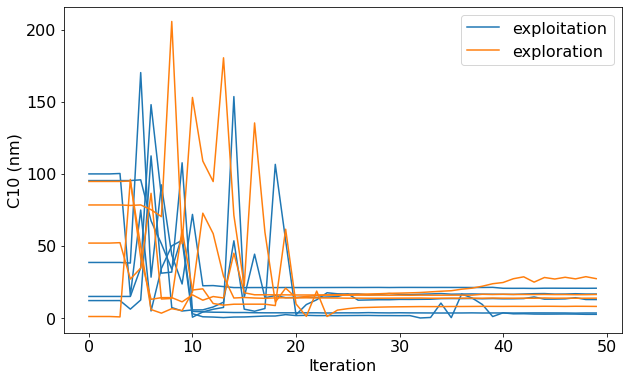

In [60]:
fig, ax = plt.subplots(1,1, figsize = [10,6])
idx = 0

name = ('GPrun_50iter_*prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C0' , label = 'exploitation')
    else:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C0' )
    
name = ('GPrun_50iter_*prediction_UCB_0.002_0.4.npy')
file_list = glob.glob('NionRelated/'+ name)
for i in range(len(file_list)):
    filename = file_list[i]
    pred = np.load(filename)
    abr = np.load(filename.replace('prediction','abr_coeff'))
    if i == 0:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C1' , label = 'exploration')
    else:
        p = ax.plot(np.abs(abr[:,1] * abr_lim[1] - abr_lim[1] / 2) * 1e9, c = 'C1' )

        
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel(abr_list[idx] + ' (nm)', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.legend(fontsize=16)
# ax.axhline(y=0.5, c='r')

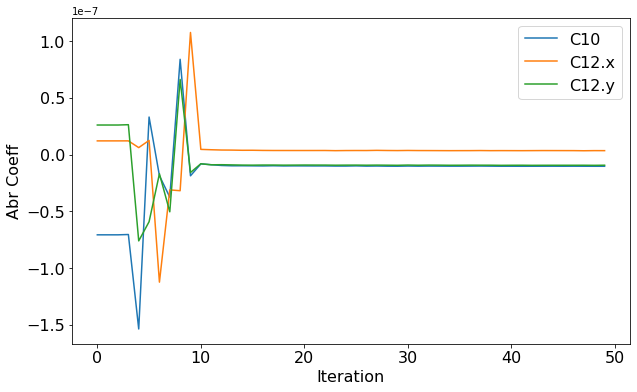

In [35]:
fig, ax = plt.subplots(1,1, figsize = [10,6])

for i in range(abr.shape[1]):
    p = ax.plot(abr[:,i] * abr_lim[i] - abr_lim[i] / 2, label = abr_list[i])
plt.legend(fontsize = 16)
ax.set_xlabel('Iteration',fontsize = 16)
ax.set_ylabel('Abr Coeff', fontsize = 16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

In [21]:
abr_list = ["C10", "C12.x", "C12.y", "C21.x", "C21.y", "C23.x", "C23.y", "C30", 
"C32.x", "C32.y", "C34.x", "C34.y"]

abr_lim = [2e-6, 2e-6, 2e-6, 3e-5, 3e-5, 3e-5, 3e-5, 4e-4, 3e-4, 3e-4, 3e-4, 3e-4]

In [67]:
name = ('GPrun_50iter_6_prediction_UCB_2_0.npy')
file_list = glob.glob('NionRelated/'+ name)
print(file_list)
filename = file_list[0]
pred = np.load(filename)
abr = np.load(filename.replace('prediction','abr_coeff'))
ronchigram = np.load(filename.replace('prediction', 'ronchigram'))
best_seen = np.argmax(pred)

['NionRelated/GPrun_50iter_6_prediction_UCB_2_0.npy']


Text(0.1, 0.1, '0.5053734885137495')

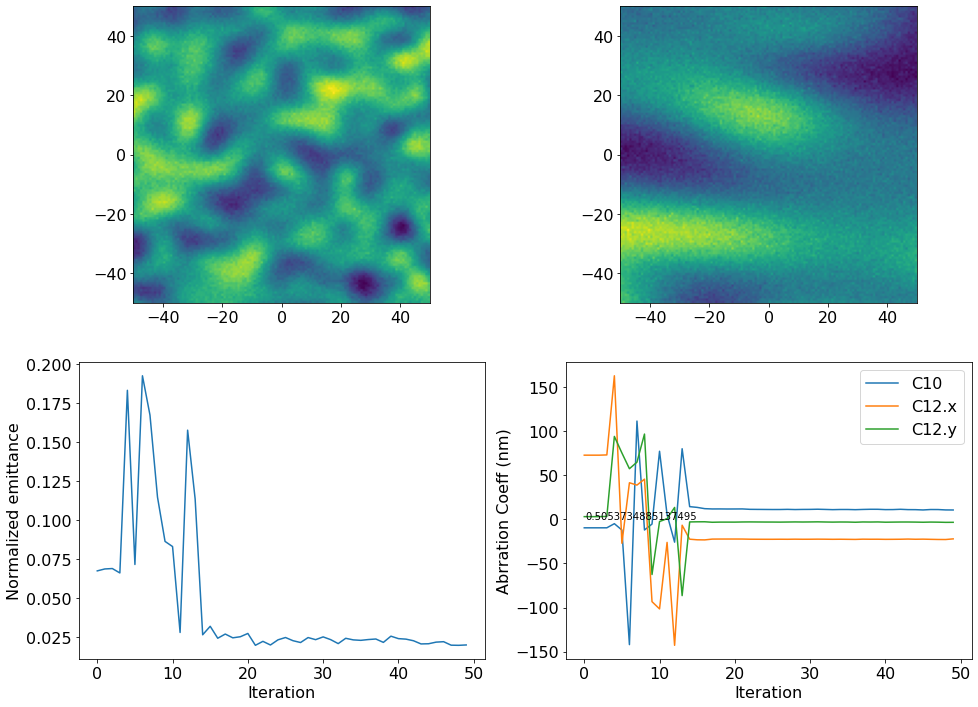

In [90]:
fig, ax = plt.subplots(2,2, figsize = [16,12])
# show initial and best Ronchigram
ax[0,0].imshow(ronchigram[0], extent = [-50,50,-50,50])
ax[0,1].imshow(ronchigram[-1], extent = [-50,50,-50,50])
ax[0,0].tick_params(axis='x', labelsize=16)
ax[0,0].tick_params(axis='y', labelsize=16)
ax[0,1].tick_params(axis='x', labelsize=16)
ax[0,1].tick_params(axis='y', labelsize=16)

# plot for normalized emittance
ax[1,0].plot(1-pred)
ax[1,0].set_xlabel('Iteration',fontsize = 16)
ax[1,0].set_ylabel('Normalized emittance', fontsize = 16)
ax[1,0].tick_params(axis='x', labelsize=16)
ax[1,0].tick_params(axis='y', labelsize=16)

# aberration coefficients:
for i in range(abr.shape[1]):
    p = ax[1,1].plot((abr[:,i] * abr_lim[i] - abr_lim[i] / 2) * 1e9, label = abr_list[i])
plt.legend(fontsize = 16)
ax[1,1].set_xlabel('Iteration',fontsize = 16)
ax[1,1].set_ylabel('Abrration Coeff (nm)', fontsize = 16)
ax[1,1].tick_params(axis='x', labelsize=16)
ax[1,1].tick_params(axis='y', labelsize=16)
ax[1,1].text(0.1, 0.1, abr[best_seen][0])

In [66]:
ronchigram.shape

(50, 1)